# K-Nearest Neighbors (KNN) Implementation 
----
This code allows you to select a school district and locate its K nearest neighbors. 
 

## Importing packages, lists, and functions 

Importing Necessary Packages 

In [1]:
import os 
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
import seaborn as sns
from sklearn.manifold import MDS
from scipy.cluster.hierarchy import linkage, dendrogram
import geopandas as gpd
import textwrap
from matplotlib.patches import ConnectionPatch
from scipy.spatial import Voronoi
import Demographic_Buckets


Importing demographic buckets from other .py file (lists containing relevant columns to run algorithm on) 

In [2]:
os.chdir(r"C:\Users\mmath\OneDrive\Desktop\Capstone\HERC_Sp25\4_Data_Modeling\4.2_KNN_Clustering")
from Demographic_Buckets import student_teacher_ratio
from Demographic_Buckets import student_count
from Demographic_Buckets import staff_count
from Demographic_Buckets import race_ethnicity_percent
from Demographic_Buckets import economically_disadvantaged
from Demographic_Buckets import special_ed_504
from Demographic_Buckets import language_education_percent
from Demographic_Buckets import special_populations_percent
from Demographic_Buckets import gifted_students
from Demographic_Buckets import district_identifiers

Importing functions from the .py file (containing all functions used for this analysis)

In [3]:
from KNN_Functions import calculate_missing_percentage
from KNN_Functions import find_nearest_districts
from KNN_Functions import plot_texas_districts
from KNN_Functions import plot_race_ethnicity_stacked_bar
from KNN_Functions import class_size_k6_cols
from KNN_Functions import plot_class_size_k6_bar

## Reading in Data & Cleaning

In [5]:
#Reading in the data
os.chdir(r"C:\Users\mmath\OneDrive\Desktop\Capstone\HERC_Sp25\4_Data_Modeling\4.2_KNN_Clustering")
df = pd.read_csv(r"C:\Users\mmath\OneDrive\Desktop\Capstone\HERC_Sp25\0_Datasets\1.7Master_Files\Individual Year Files_Take2\merged_2023.csv")
distgrad = pd.read_csv(r"C:\Users\mmath\OneDrive\Desktop\Capstone\HERC_Sp25\0_Datasets\1.6Data2023\District\clean_data\distgrad_2023_clean.csv")
distprof = pd.read_csv(r"C:\Users\mmath\OneDrive\Desktop\Capstone\HERC_Sp25\0_Datasets\1.6Data2023\District\clean_data\distprof_2023_clean.csv")
df = df[df['Charter School (Y/N)'] == 'N']
demographic_df = df[student_teacher_ratio + student_count + staff_count + race_ethnicity_percent + economically_disadvantaged +
                    special_ed_504 + language_education_percent + special_populations_percent + gifted_students +
                    district_identifiers]

# Select only numeric columns
numeric_cols = df.select_dtypes(include='number').columns

# Replace negative values with NaN only in numeric columns
df[numeric_cols] = df[numeric_cols].mask(df[numeric_cols] < 0, np.nan)


#plt.hist(calculate_missing_percentage(demographic_df) / 100)
#plt.title("Histogram of percentage of NA values in columns within demographic attributes")
#demographic_df


In [11]:
df[student_teacher_ratio + student_count + staff_count]

#df[selected_features]

,District 2023 Staff: Teacher Student Ratio,District 2022-23 Total Students Count,District 2023 Staff: All Staff Total Full Time Equiv Count
0,12.3,594,102.0
1,11.4,1194,189.0
2,11.8,802,141.7
3,11.0,310,62.2
4,13.1,3297,561.6
...,...,...,...
1204,9.5,220,41.8
1205,10.0,729,135.7
1206,14.1,3376,546.2
1207,16.0,1799,310.2


Key takaways, the demographic data contains very few columns with a lot of NAs! The outcome oriented data on the other hand varies slightly. Regardless, the data science portion (fitting a knn model) will occur on mostly complete data

## Fitting model on Houston ISD to find 5 nearest neighbors for different distance metrics
---
Target District: Houston ISD (101912)  
Feature buckets used:   
* class_size_student_teacher_ratios  
* race_ethnicity_percent  
* staff_demographics_experience   


Number of Neighbors: 5   
Imputation Strategy: Median  


Distance Metric: euclidean
     DISTRICT_id               DISTNAME
532       101912            HOUSTON ISD
285        57905             DALLAS ISD
528       101907  CYPRESS-FAIRBANKS ISD
91         15915          NORTHSIDE ISD
534       101914               KATY ISD


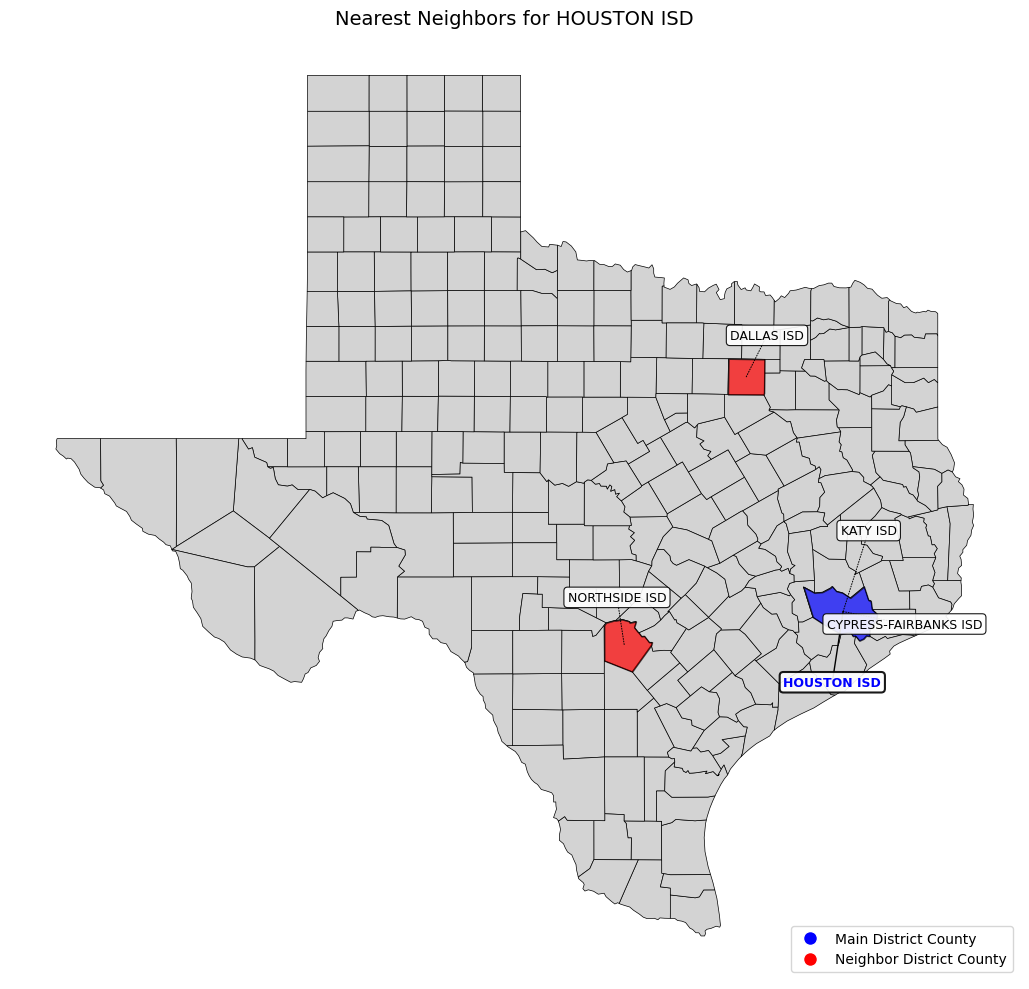

HOUSTON ISD


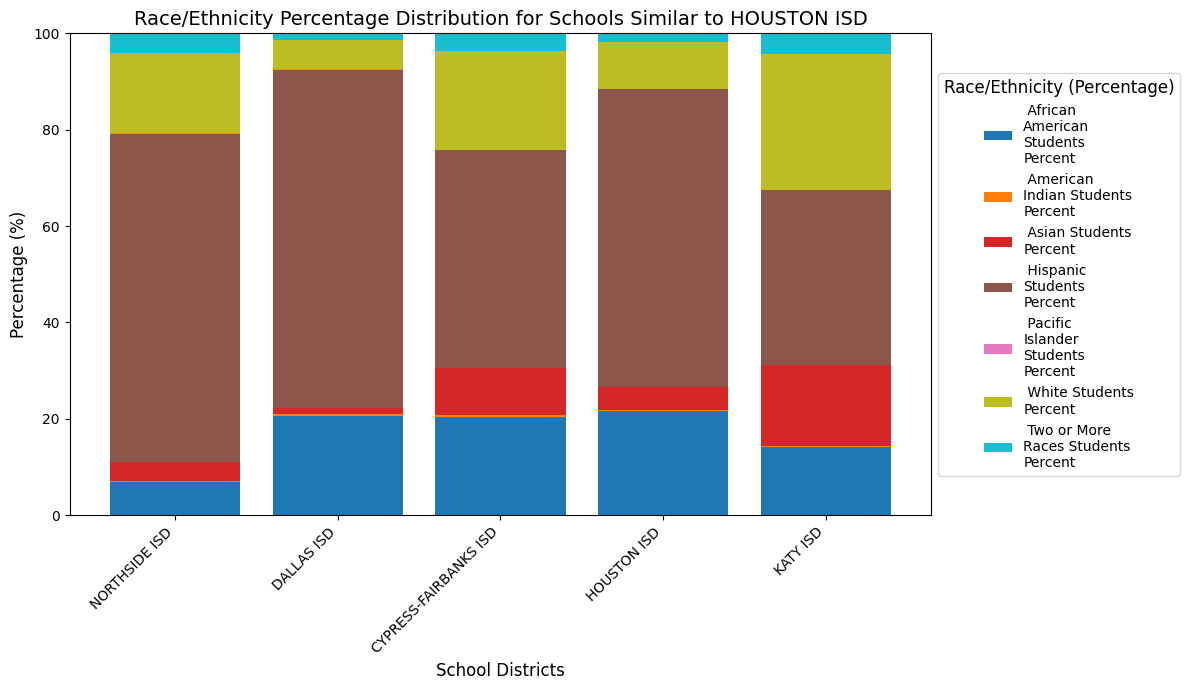

Input District: HOUSTON ISD


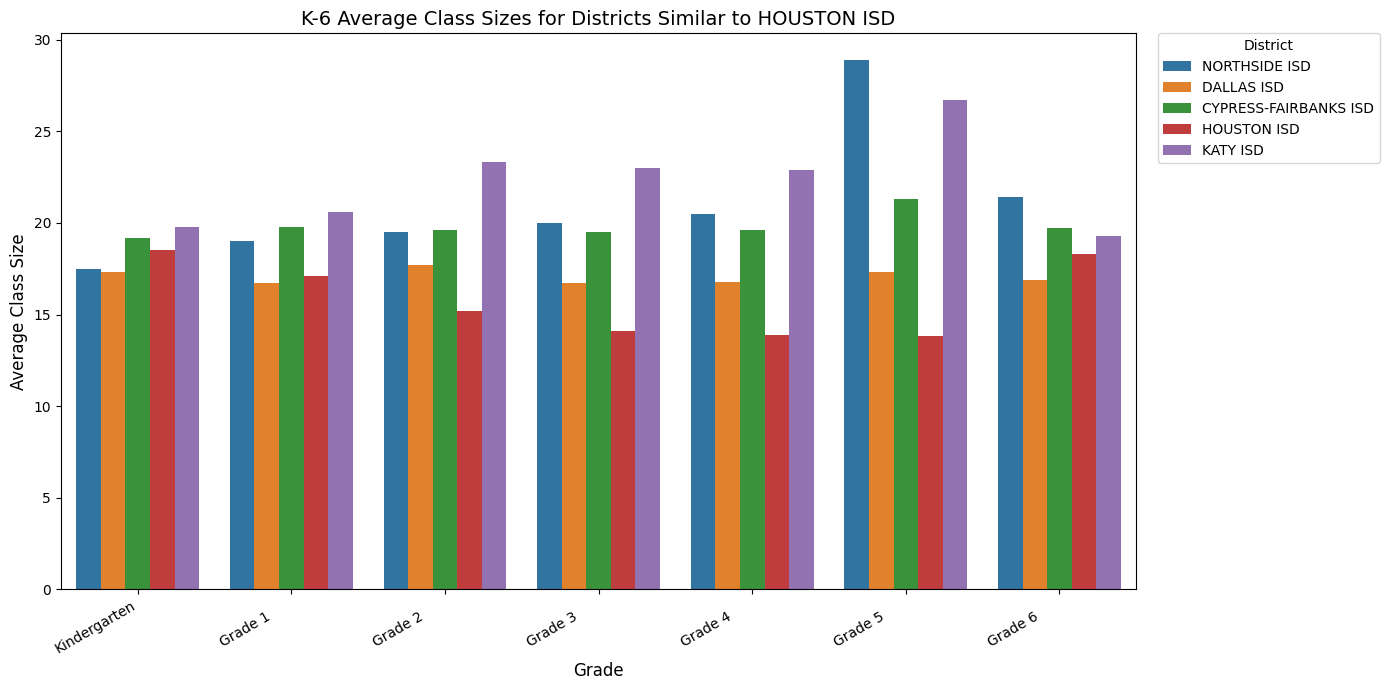

Distance Metric: manhattan
      DISTRICT_id               DISTNAME
532        101912            HOUSTON ISD
285         57905             DALLAS ISD
528        101907  CYPRESS-FAIRBANKS ISD
1040       220905         FORT WORTH ISD
91          15915          NORTHSIDE ISD


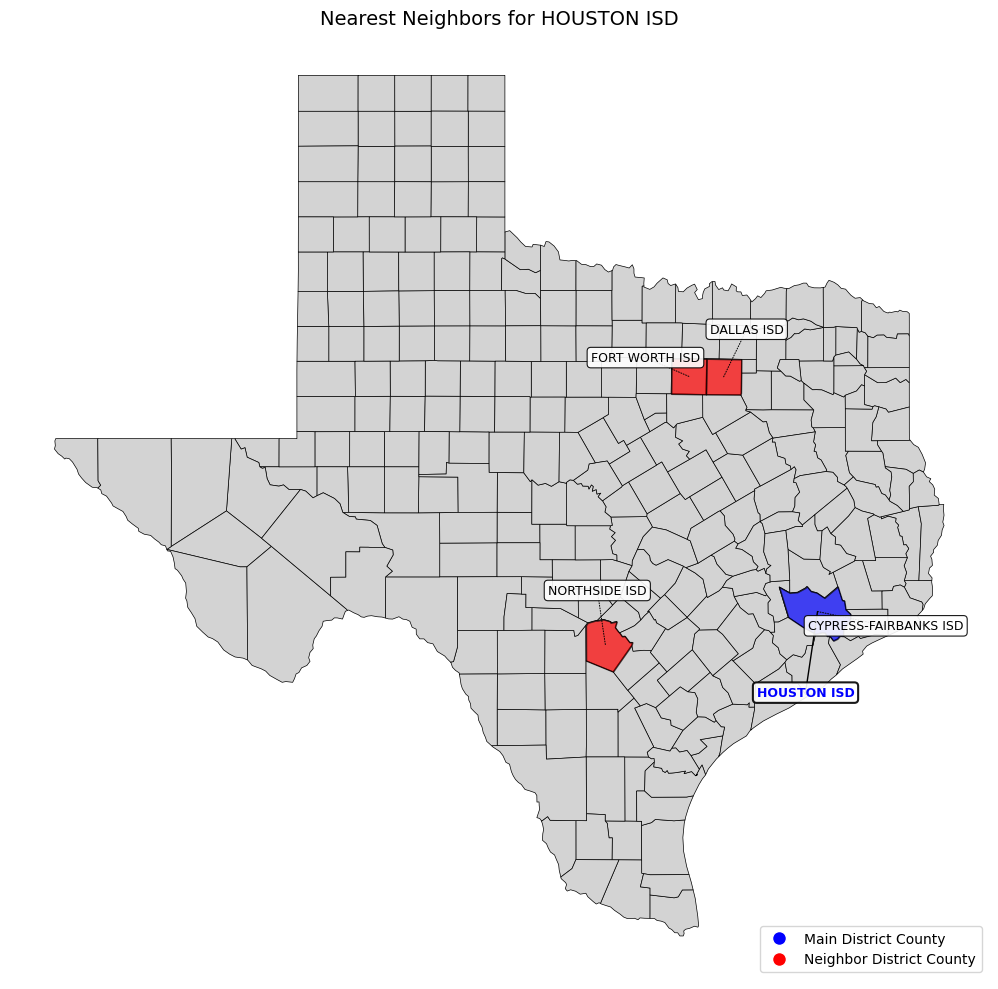

HOUSTON ISD


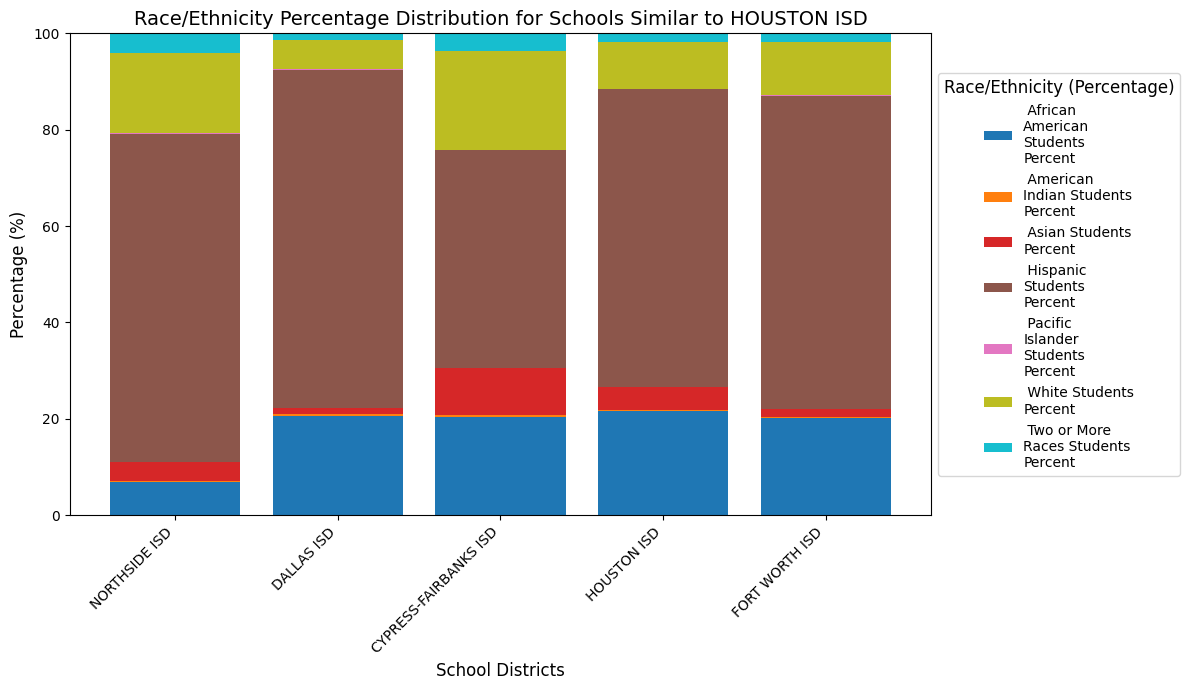

Input District: HOUSTON ISD


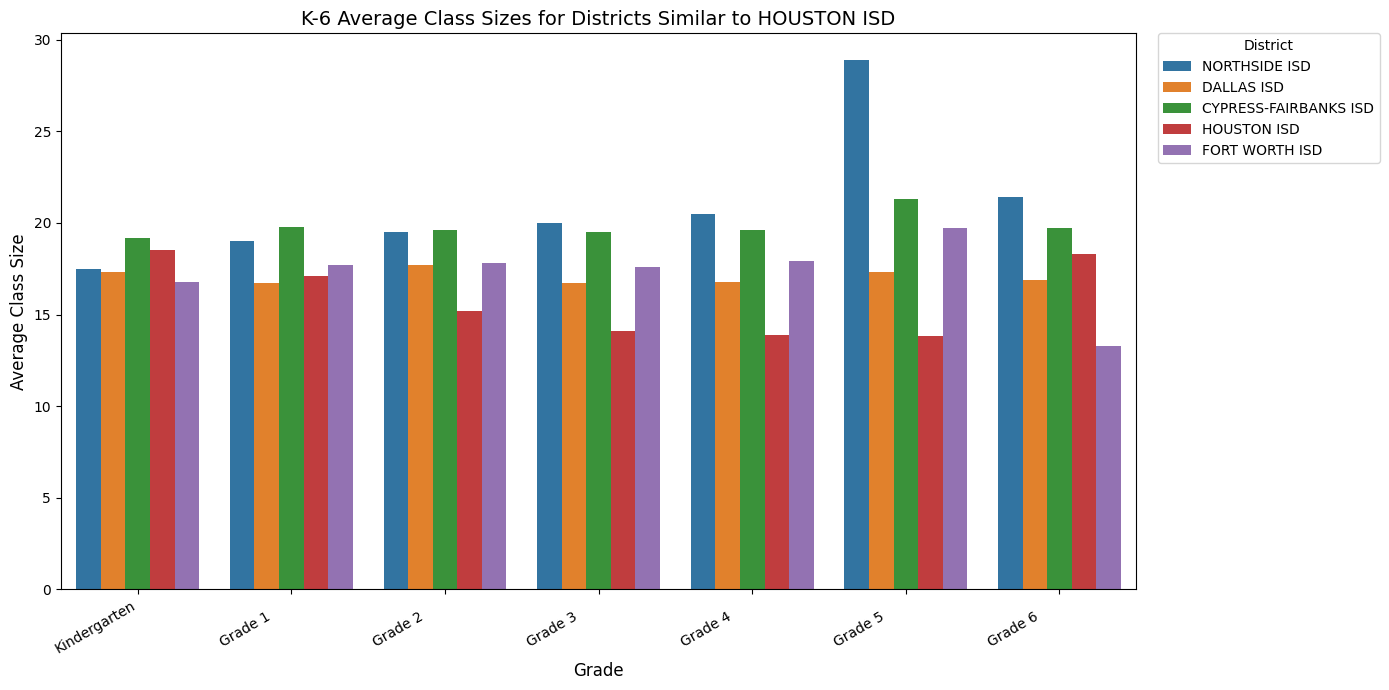

Distance Metric: mahalanobis
      DISTRICT_id               DISTNAME
532        101912            HOUSTON ISD
285         57905             DALLAS ISD
528        101907  CYPRESS-FAIRBANKS ISD
91          15915          NORTHSIDE ISD
1040       220905         FORT WORTH ISD


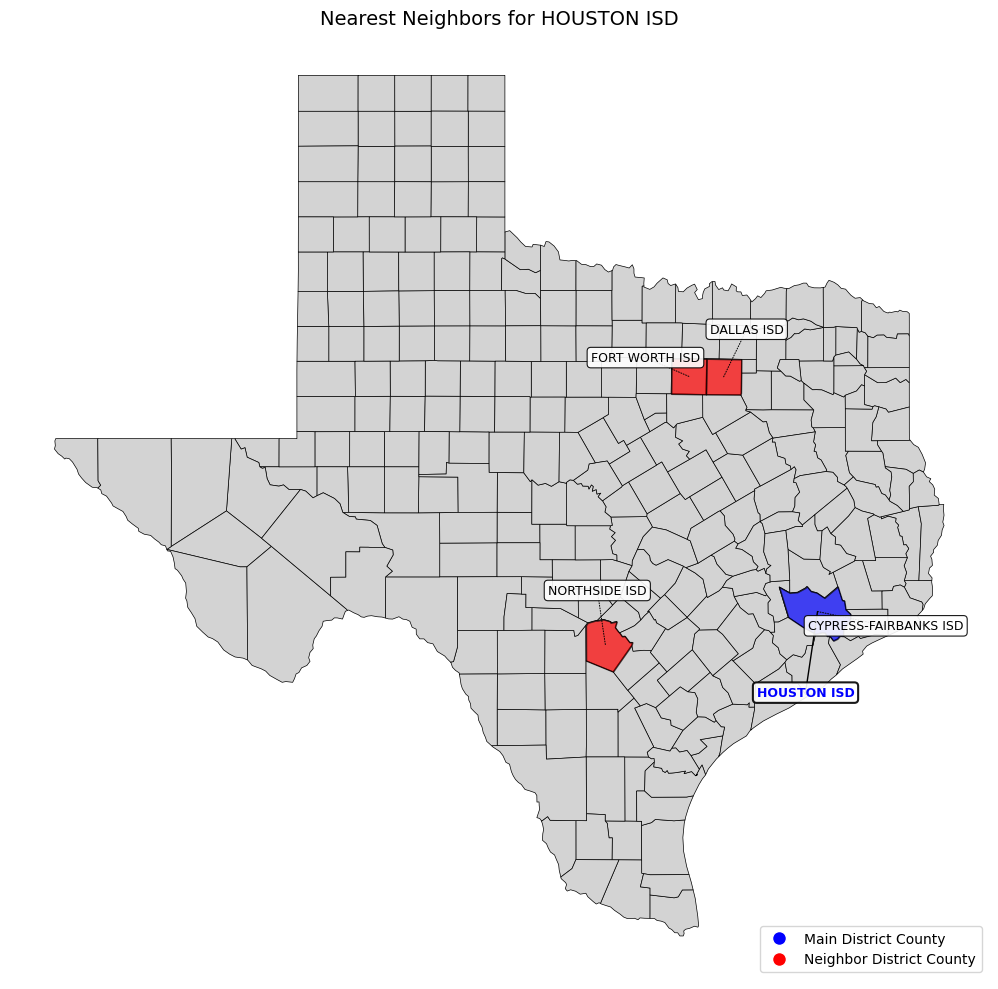

HOUSTON ISD


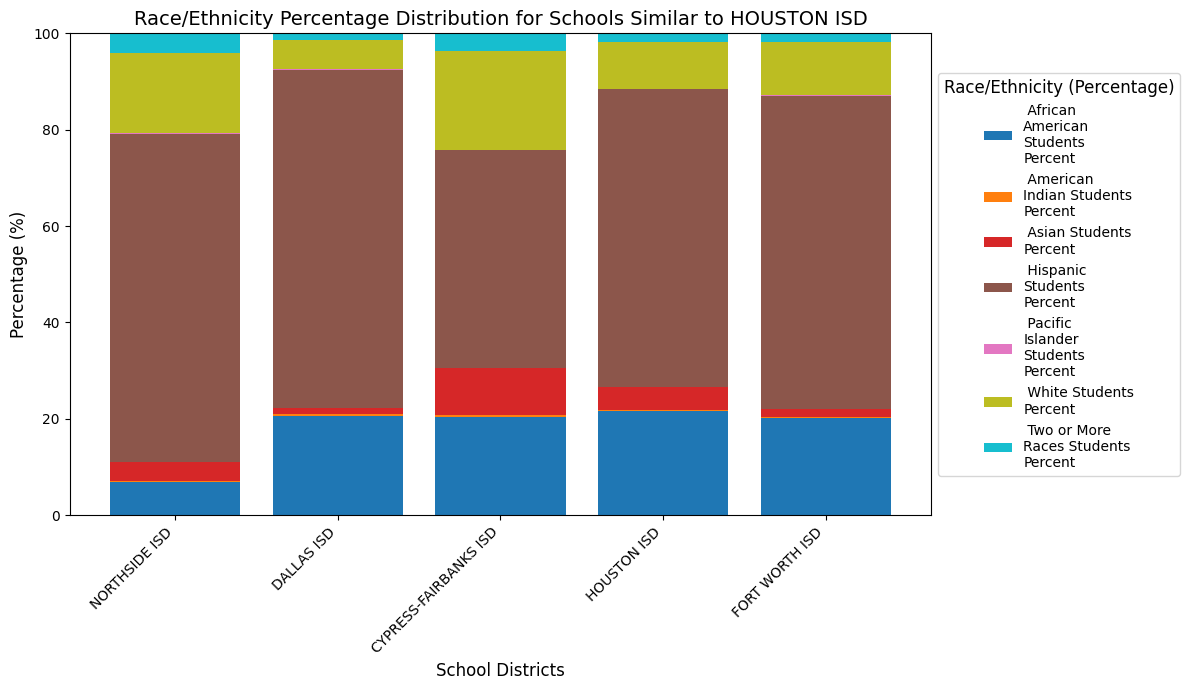

Input District: HOUSTON ISD


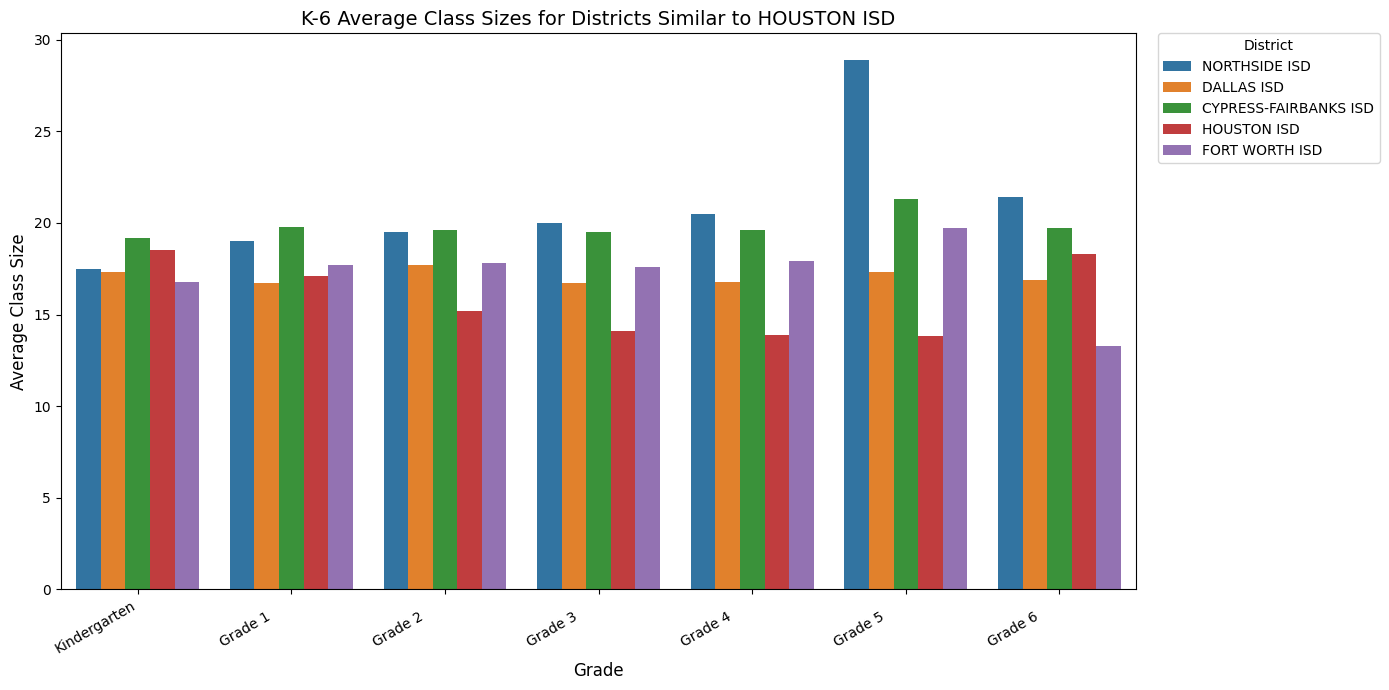

Distance Metric: cosine
     DISTRICT_id               DISTNAME
532       101912            HOUSTON ISD
528       101907  CYPRESS-FAIRBANKS ISD
285        57905             DALLAS ISD
534       101914               KATY ISD
91         15915          NORTHSIDE ISD


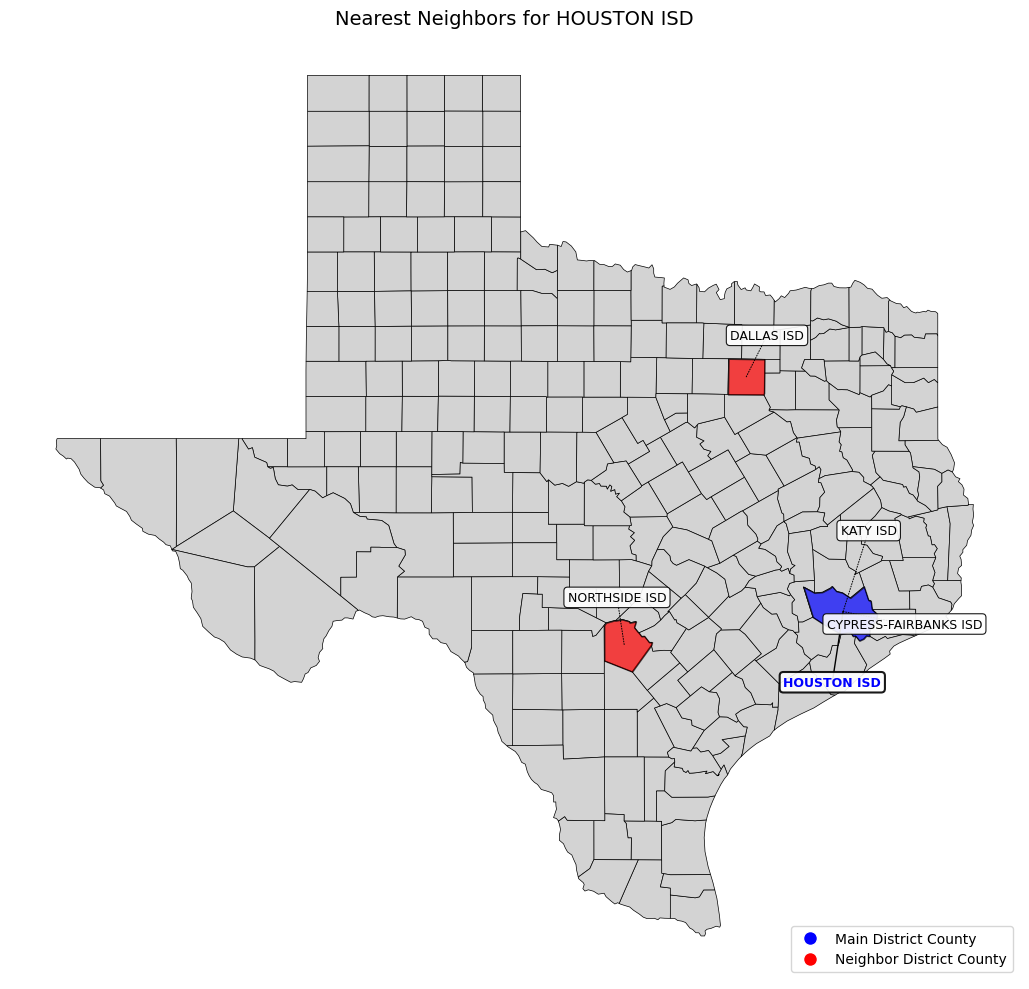

HOUSTON ISD


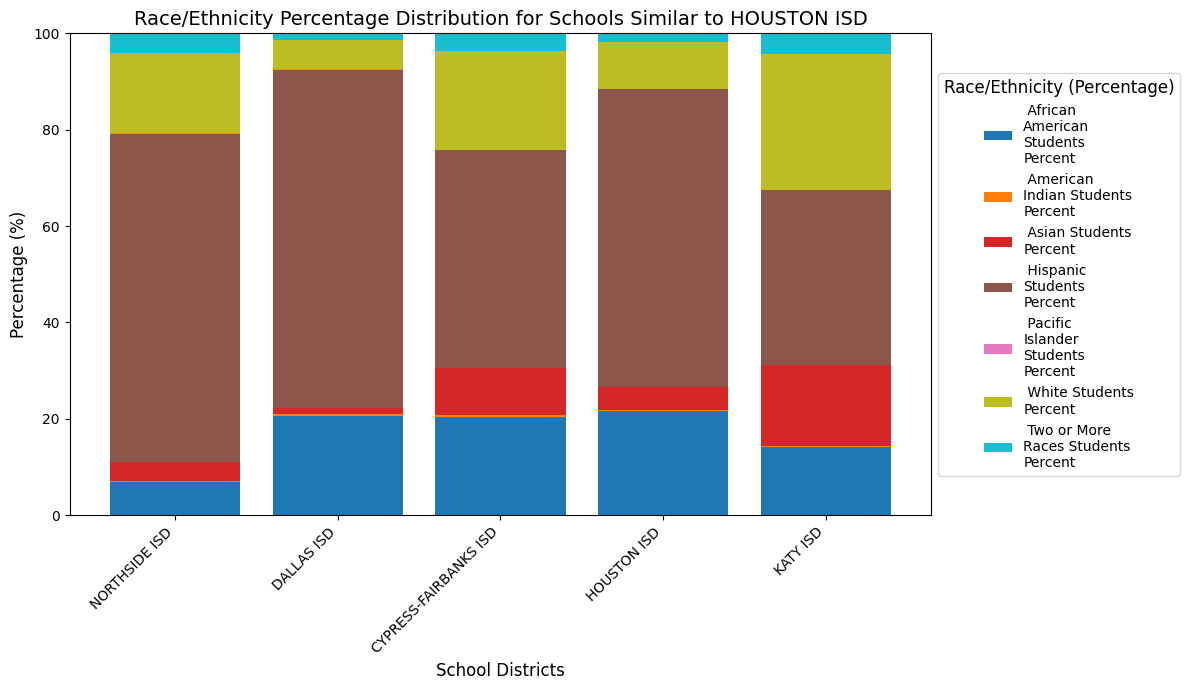

Input District: HOUSTON ISD


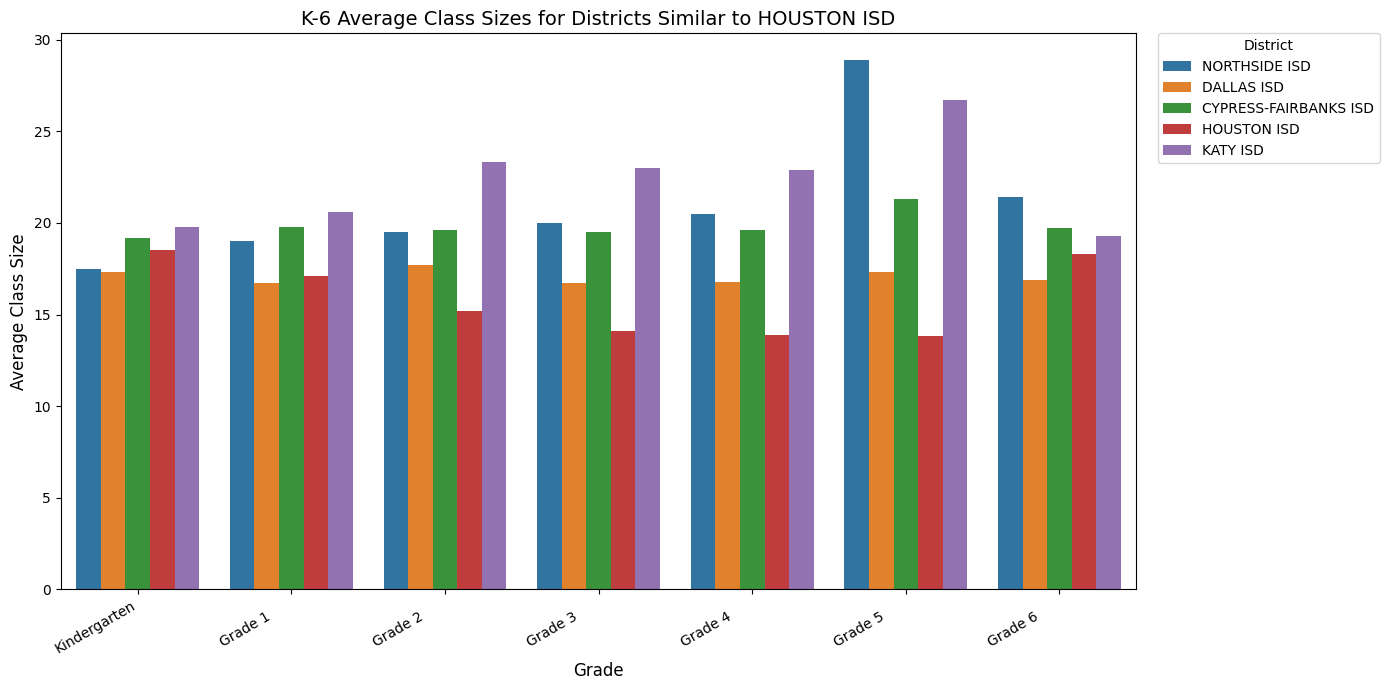

Distance Metric: canberra
      DISTRICT_id               DISTNAME
532        101912            HOUSTON ISD
1040       220905         FORT WORTH ISD
285         57905             DALLAS ISD
289         57910      GRAND PRAIRIE ISD
528        101907  CYPRESS-FAIRBANKS ISD


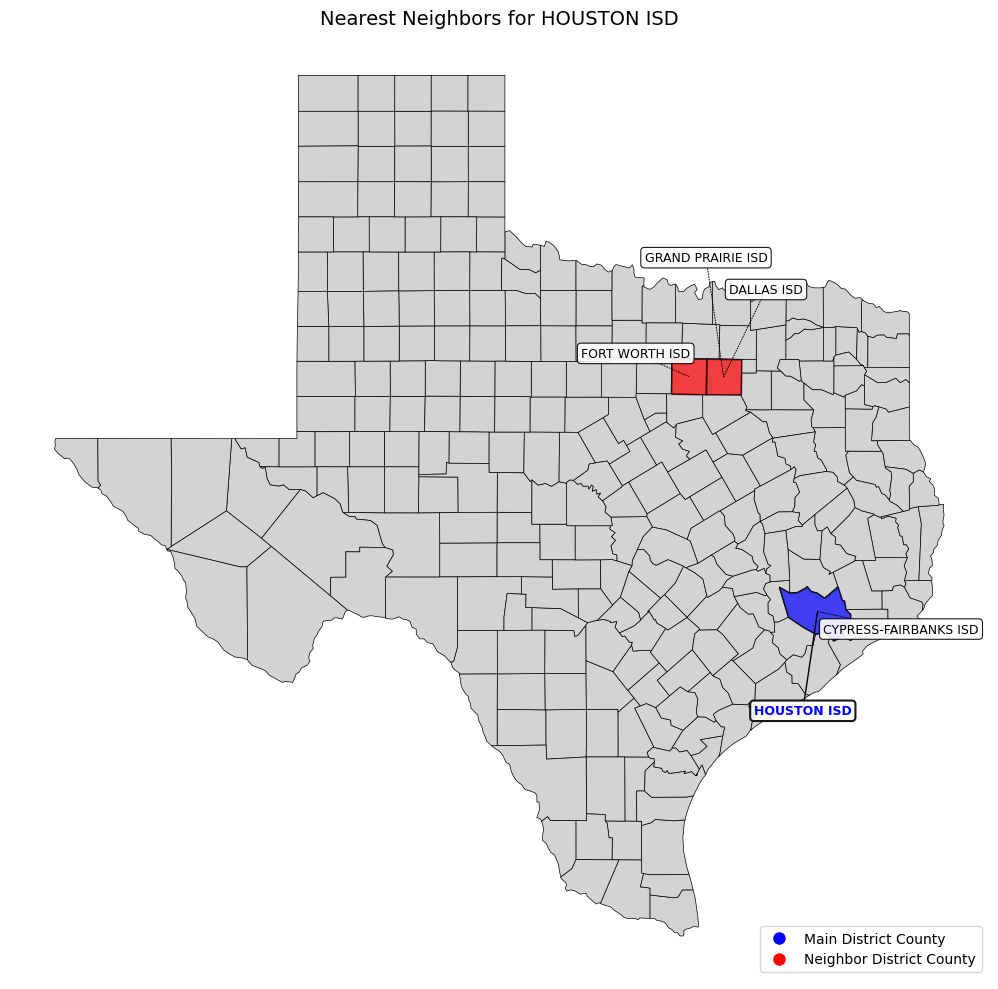

HOUSTON ISD


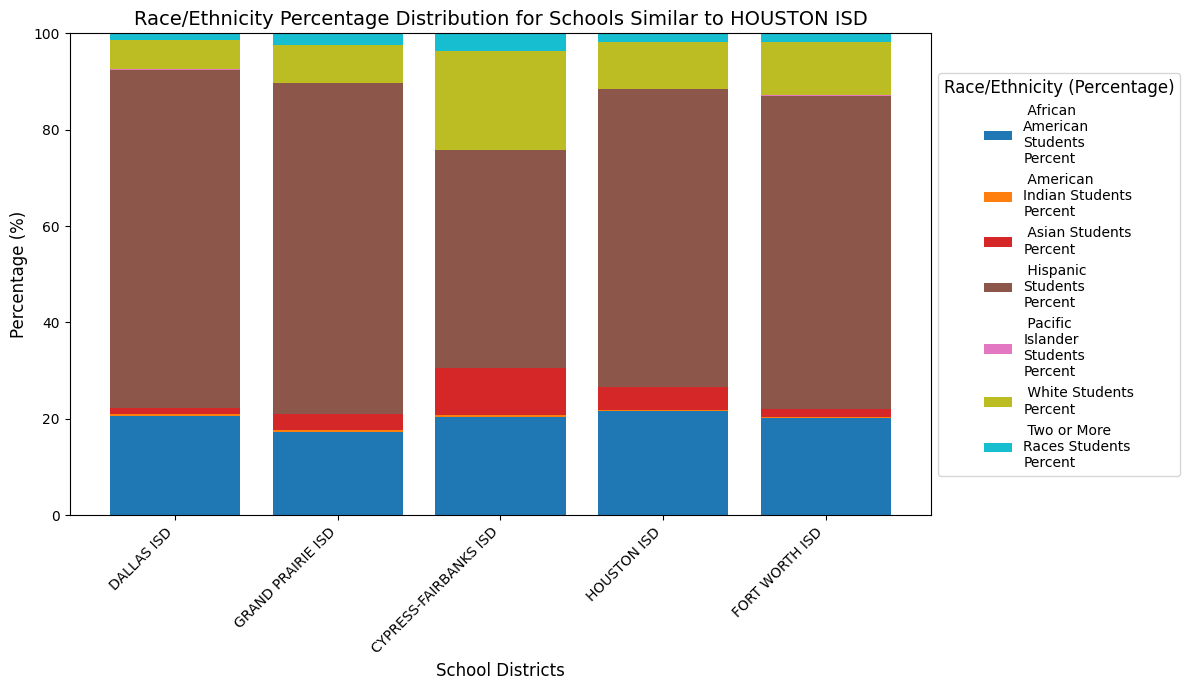

Input District: HOUSTON ISD


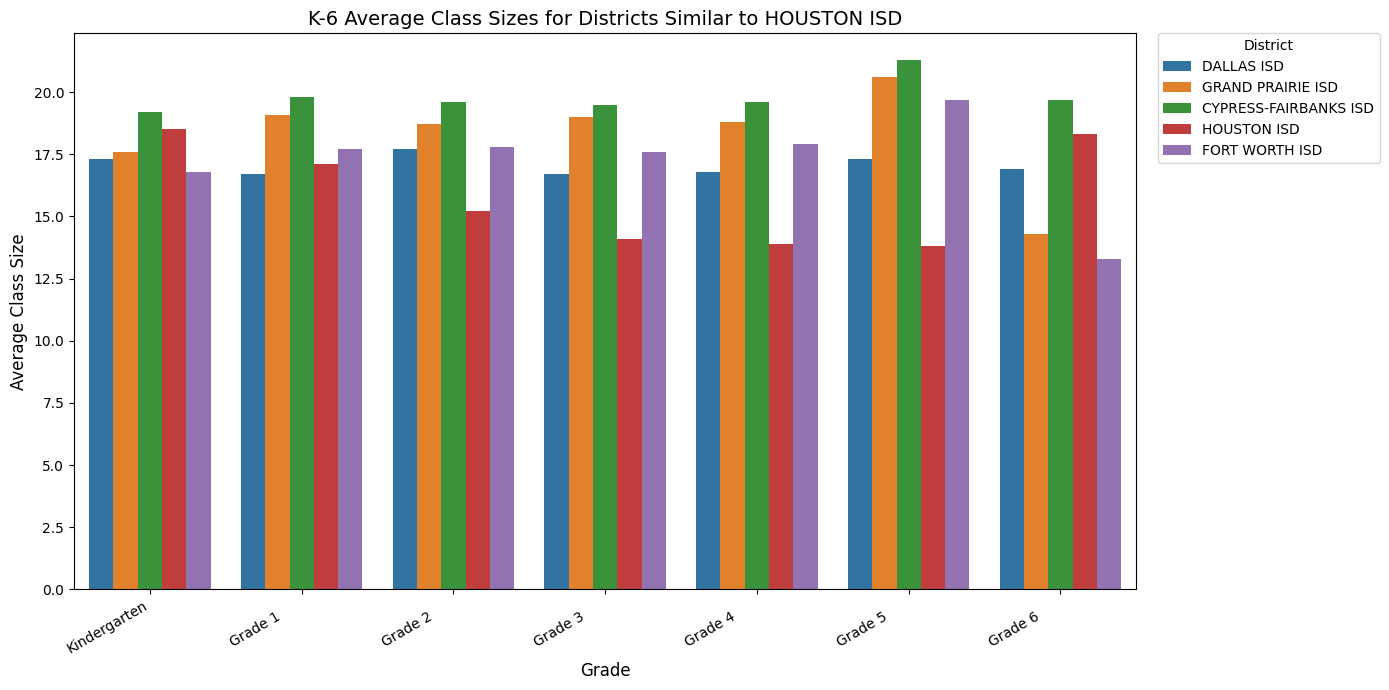

In [8]:
distance_metrics = ['euclidean', 'manhattan', 'mahalanobis', 'cosine', 'canberra']
selected_features = race_ethnicity_percent +  student_teacher_ratio + student_count

for distance_metric in distance_metrics: 
    print(f"Distance Metric: {distance_metric}")
    knn_model = find_nearest_districts(df, 101912, selected_features, 5, distance_metric, "median")
    print(knn_model)
    plot_texas_districts(knn_model, df)
    plot_race_ethnicity_stacked_bar(knn_model, df)
    plot_class_size_k6_bar(knn_model, df)
    
    